#### Exercice from the book "Practical Machine Learning and Image Processing" (Himanshu Singh)
# Finding Palm Lines

Creating useful functions for getting and showing images

In [15]:
import os
from os import walk
from pylab import *
from skimage import io
import cv2

def get_images(path):
    real_images = []
    for _, _, images in walk(path):
        for image in images:
            img = cv2.imread(os.path.join(path, image))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            real_images.append(img)
    return real_images

def show_images(images):
    i=0
    for image in images:
        figure(i)
        io.imshow(image)
        i += 1

Calling those functions:

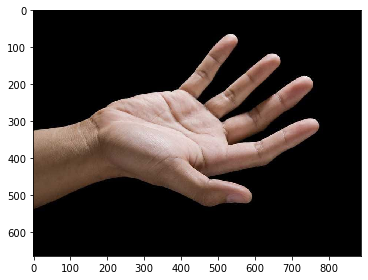

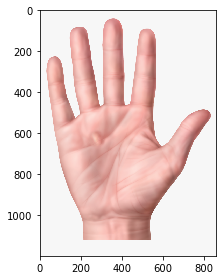

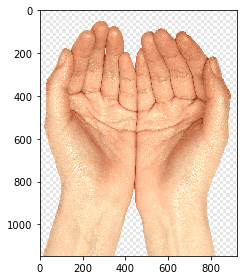

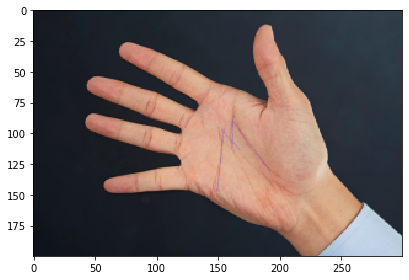

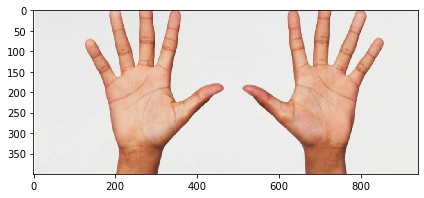

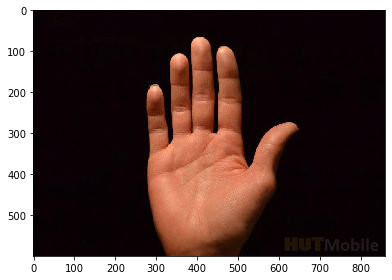

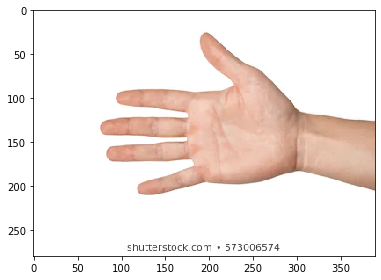

In [16]:
imgs = get_images('../input/hands/hands')
show_images(imgs)

#### Converting to gray scale:

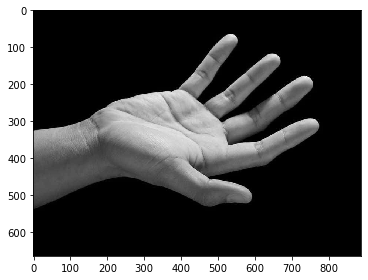

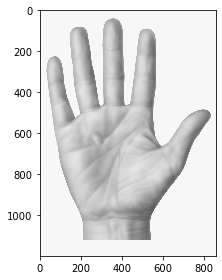

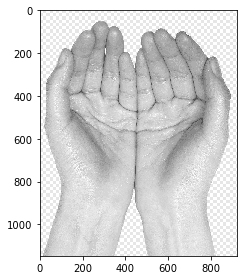

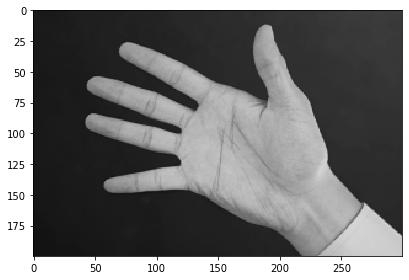

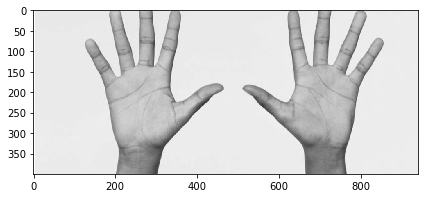

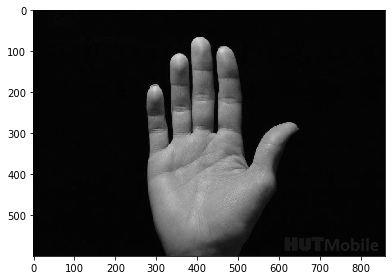

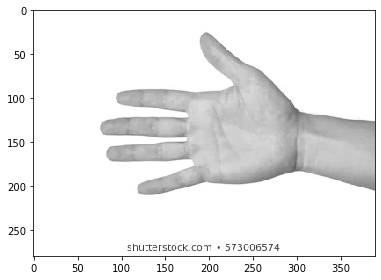

In [17]:
def convert_gray(imgs):
    gray_images = []
    for img in imgs:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray_images.append(gray_img)
    return gray_images

grays = convert_gray(imgs)
show_images(grays)

## Then we use the filter algorithm "Canny Edge Detector" to find the palm lines:

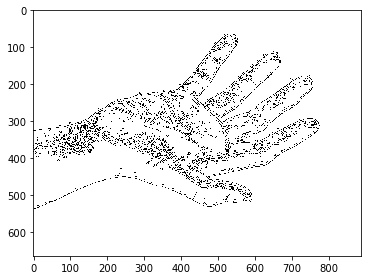

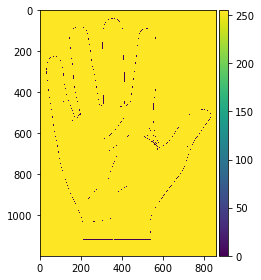

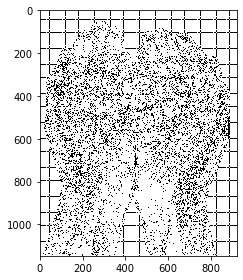

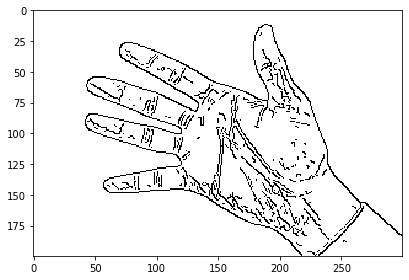

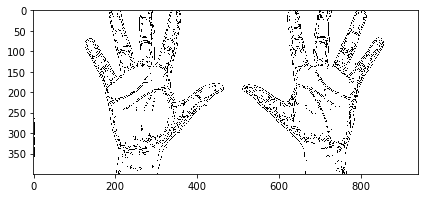

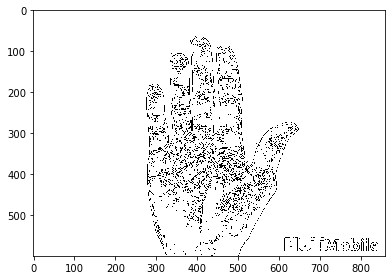

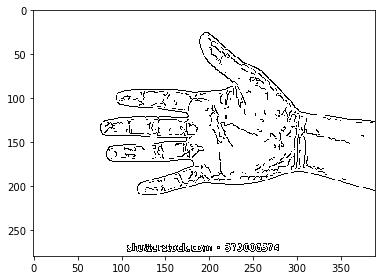

In [18]:
def detect_edges(grays):
    edges = []
    for gray in grays:
        edge = cv2.Canny(gray, 40, 55, apertureSize=3)
        # making the lines black:
        edge = cv2.bitwise_not(edge)
        edges.append(edge)
    return edges

edges = detect_edges(grays)
show_images(edges)

### Next we blend the previous image with the original one:

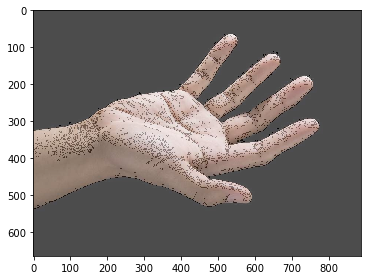

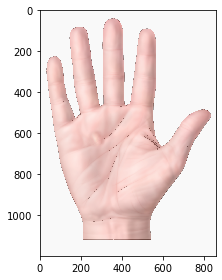

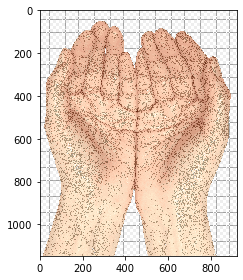

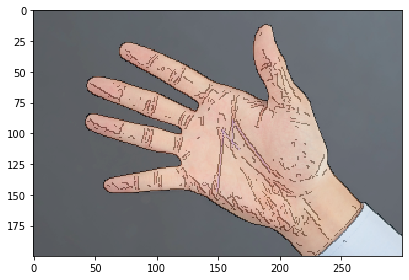

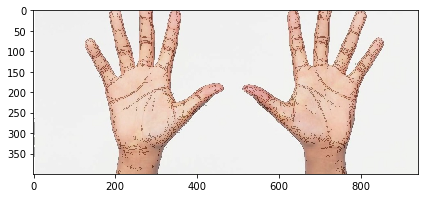

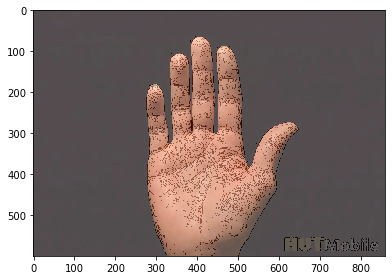

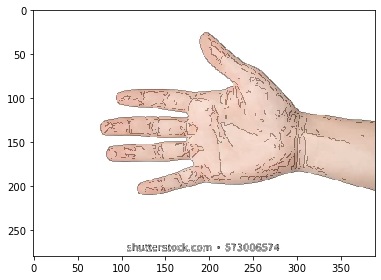

In [19]:
def blend_images(imgs, edges):
    blended_imgs = []
    for img, edge in zip(imgs, edges):
        # the 2 images need to have the same number of channels, so im putting 3 channels in the edges0 image:
        edge = cv2.cvtColor(edge, cv2.COLOR_GRAY2RGB)
        blended_img = cv2.addWeighted(edge, 0.3, img, 0.7, 0)
        blended_imgs.append(blended_img)
    return blended_imgs

blended_imgs = blend_images(imgs, edges)
show_images(blended_imgs)